### Mini projeto 01 - Analise de dados do IMDB

Neste Mini-Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

Guias avançados de Análise Exploratória de Dados são fornecidos na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>.

Para aprender mais sobre Linguagem SQL:

- <a href="https://www.datascienceacademy.com.br/path-player?courseid=microsoft-power-bi-para-data-science">SQL Analytics Básico</a>
- <a href="https://www.datascienceacademy.com.br/course/modelagem-de-banco-de-dados-relacionais-nao-relacionais-e-data-stores">SQL Analytics Avançado</a>

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1 - Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2 - Qual o Número de Títulos Por Gênero?
- 3 - Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4 - Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5 - Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6 - Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7 - Qual a Relação Entre Duração e Gênero?
- 8 - Qual o Número de Filmes Produzidos Por País?
- 9 - Quais São os Top 10 Melhores Filmes?
- 10 - Quais São os Top 10 Piores Filmes?

In [4]:
%pip install -q imdb-sqlite

Note: you may need to restart the kernel to use updated packages.


In [5]:
# importar todas as bibliotecas necessárias
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [6]:
# criar conexao no banco de dados
con = sqlite3.connect('imdb.db')

In [7]:
cursor = con.cursor()

In [8]:
# esse comando pode ser feito direto da conexao 
# como por meio de um cursor
cursor = cursor.execute("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'")

In [9]:
# esse comando pode ser feito direto da conexao 
# como por meio de um cursor
cursor = con.execute("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'")

In [10]:
#imprimir a saida da query
for x in cursor:
    print(x)

('people',)
('titles',)
('akas',)
('crew',)
('episodes',)
('ratings',)


In [11]:
# extrair as o nome das tabelas usando a biblioteca Pandas
# o retorno pelo pandas e melhor organizado
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", con)

In [12]:
# criar um dataframe com metodos uteis para manipular
# os dados
type(tabelas)

pandas.core.frame.DataFrame

In [13]:
# metodos dentro do dataframe
dir(tabelas)

['T',
 'Table_Name',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',

In [14]:
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [15]:
# converter o DataFrame em uma lista
tabelas = tabelas['Table_Name'].values.tolist()

In [16]:
print(tabelas)

['people', 'titles', 'akas', 'crew', 'episodes', 'ratings']


In [17]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, con)
    print(f'Esquema da tabela = {tabela}')
    display(resultado)
    print("-"*100)
    print('\n')

Esquema da tabela = people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela = titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela = akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela = crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela = episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela = ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




### Análise exploratória dos dados

### Quais são as categorias de filmes mais comuns do IMDB?
1 - Capturar as categorias dos filmes
2 - Verificar a quantidade de filmes por categoria
3 - Gerar gráfico desses dados

In [18]:
# Essa query usa a funcao count do SQL para contar as ocorrencias
consulta = ('''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''')

In [19]:
resultado1 = pd.read_sql_query(consulta, con)

In [20]:
display(resultado1)

,type,COUNT
0,movie,625129
1,short,896190
2,tvEpisode,7031272
3,tvMiniSeries,45656
4,tvMovie,137986
5,tvPilot,2
6,tvSeries,233011
7,tvShort,10702
8,tvSpecial,38806
9,video,266435


In [21]:
# Vamos calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [22]:
display(resultado1)

,type,COUNT,percentual
0,movie,625129,6.708974
1,short,896190,9.618040
2,tvEpisode,7031272,75.460621
3,tvMiniSeries,45656,0.489987
4,tvMovie,137986,1.480886
5,tvPilot,2,0.000021
6,tvSeries,233011,2.500708
7,tvShort,10702,0.114855
8,tvSpecial,38806,0.416472
9,video,266435,2.859419


Capturar o 4º maior valor para fazer a categoria outros no gráfico

In [23]:

percents = resultado1[ 'percentual'].values.tolist()

In [24]:
print(percents)

[6.708974207761208, 9.618039788993178, 75.46062092104759, 0.4899867490222749, 1.4808855692699234, 2.1464287235950363e-05, 2.500707516568015, 0.1148554009995704, 0.4164715652391449, 2.859418684855217, 0.35001813195664255]


In [25]:
percents.sort(reverse=True)
print(percents)
value = percents[3]

[75.46062092104759, 9.618039788993178, 6.708974207761208, 2.859418684855217, 2.500707516568015, 1.4808855692699234, 0.4899867490222749, 0.4164715652391449, 0.35001813195664255, 0.1148554009995704, 2.1464287235950363e-05]


In [26]:
print(value)

2.859418684855217


Gerar gráfico

In [27]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] <= value]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] <= value]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [28]:
others

{'COUNT': 765212, 'percentual': 8.212365082198025, 'type': 'others'}

In [29]:
resultado1 = resultado1[resultado1['percentual'] > value]

In [30]:
print(resultado1)

        type    COUNT  percentual
0      movie   625129    6.708974
1      short   896190    9.618040
2  tvEpisode  7031272   75.460621


In [31]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index=True)

In [32]:
print(resultado1)

        type    COUNT  percentual
0      movie   625129    6.708974
1      short   896190    9.618040
2  tvEpisode  7031272   75.460621
3     others   765212    8.212365


In [33]:
resultado1 = resultado1.sort_values(by = 'COUNT', ascending= False)

In [34]:
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,7031272,75.460621
1,short,896190,9.618040
3,others,765212,8.212365
0,movie,625129,6.708974


In [35]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

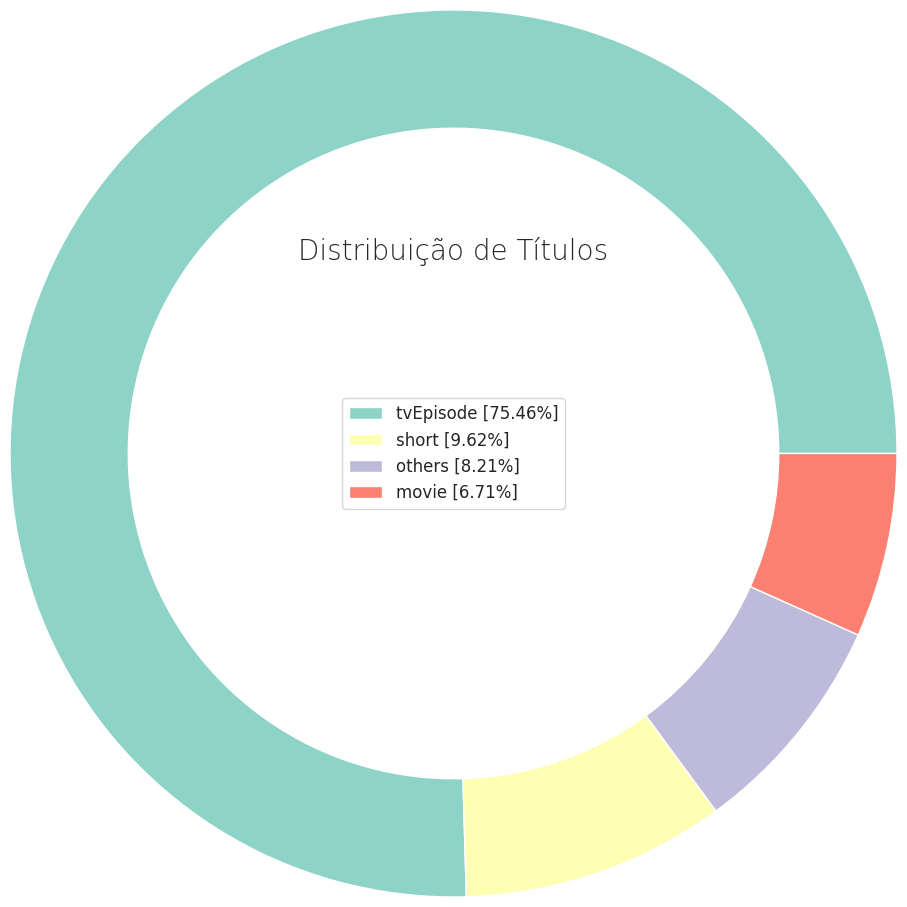

In [36]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

### 2 - Qual o número de títulos por gênero

In [42]:
# criando a consulta para recuperar os dados
consulta2 = '''SELECT genres, COUNT(*) AS COUNT FROM titles WHERE type = 'movie' GROUP BY genres'''

In [47]:
# executando a consulta
resultado2 = pd.read_sql_query(consulta2, con)

In [48]:
display(resultado2)

,genres,COUNT
0,Action,14239
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1465,"Thriller,Western",42
1466,War,1314
1467,"War,Western",15
1468,Western,5169


In [49]:
resultado2['genres'] = resultado2['genres'].str.lower().values

In [50]:
display(resultado2)

,genres,COUNT
0,action,14239
1,"action,adult",11
2,"action,adult,adventure",2
3,"action,adult,comedy",6
4,"action,adult,crime",9
...,...,...
1465,"thriller,western",42
1466,war,1314
1467,"war,western",15
1468,western,5169


In [51]:
temp = resultado2['genres'].dropna()

In [52]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [53]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [54]:
bag_generos = vetor.transform(temp)

In [55]:
type(bag_generos)

scipy.sparse._csr.csr_matrix

In [57]:
generos_unicos = vetor.get_feature_names()

In [58]:
print(generos_unicos)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'n', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western']


In [59]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [60]:
display(generos)

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [62]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [63]:
# Visualiza
generos_percentual.head(10)

drama          17.959184
comedy         17.074830
documentary    15.986395
adventure      14.693878
action         14.489796
romance        13.265306
crime          12.993197
mystery        12.380952
thriller       12.244898
horror         12.176871
dtype: float64

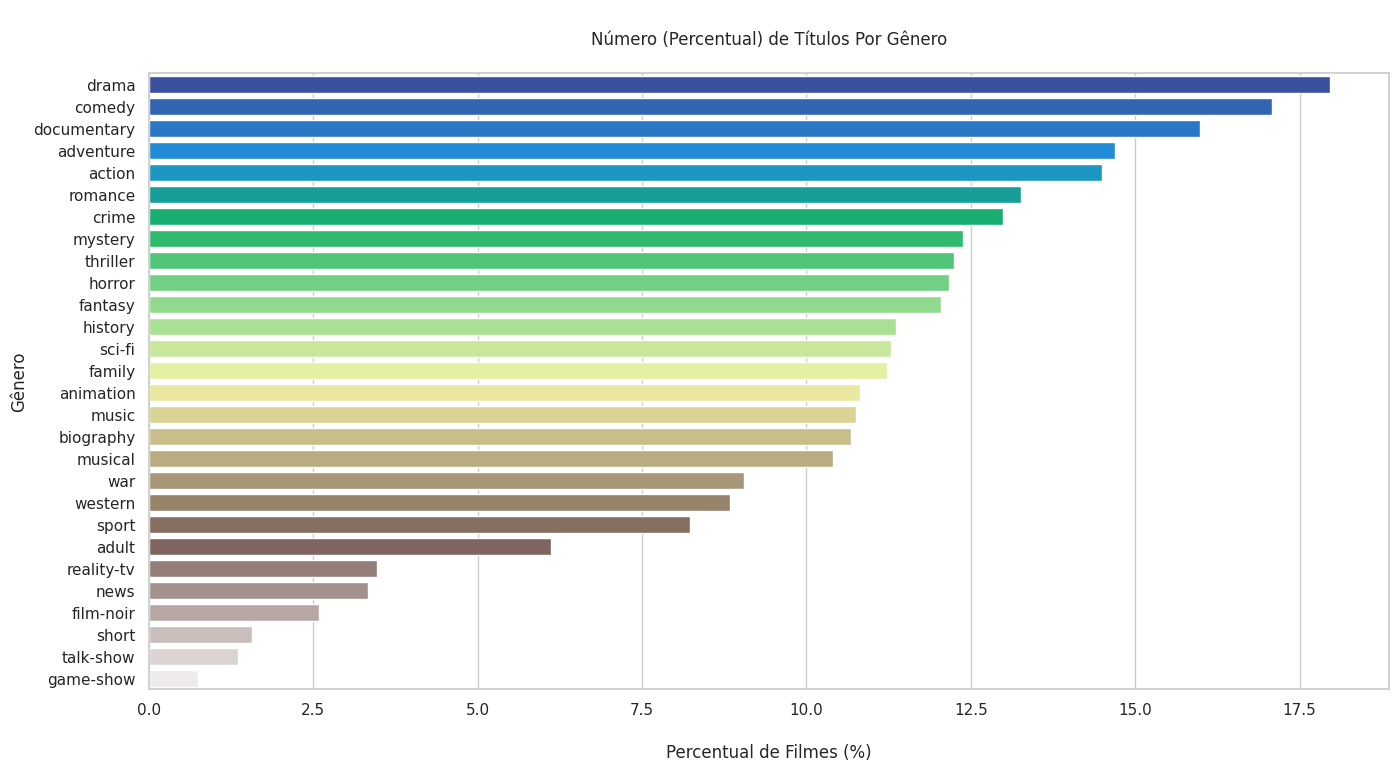

In [64]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

### 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

In [65]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 

In [67]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, con)

In [68]:
# Visualiza
display(resultado3)

,rating,genres
0,5.2,Romance
1,4.2,\N
2,6.0,"Action,Adventure,Biography"
3,5.1,Drama
4,4.3,Drama
...,...,...
281616,5.8,Thriller
281617,6.4,"Drama,History"
281618,3.8,"Adventure,History,War"
281619,8.3,Drama


In [69]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [70]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [71]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [72]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [73]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, con)
    genero_counts.append(resultado.values[0][0])
  
    # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, con)
    genero_ratings.append(np.median(resultado['rating']))

In [74]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [75]:
display(df_genero_ratings)

,genres,count,rating
0,action,29219,5.80
1,adult,4105,5.70
2,adventure,17718,6.00
3,animation,4855,6.60
4,biography,8661,7.00
5,comedy,69699,6.00
6,crime,24226,6.10
7,documentary,42621,7.30
8,drama,125129,6.40
9,family,10894,6.30


In [76]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [77]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

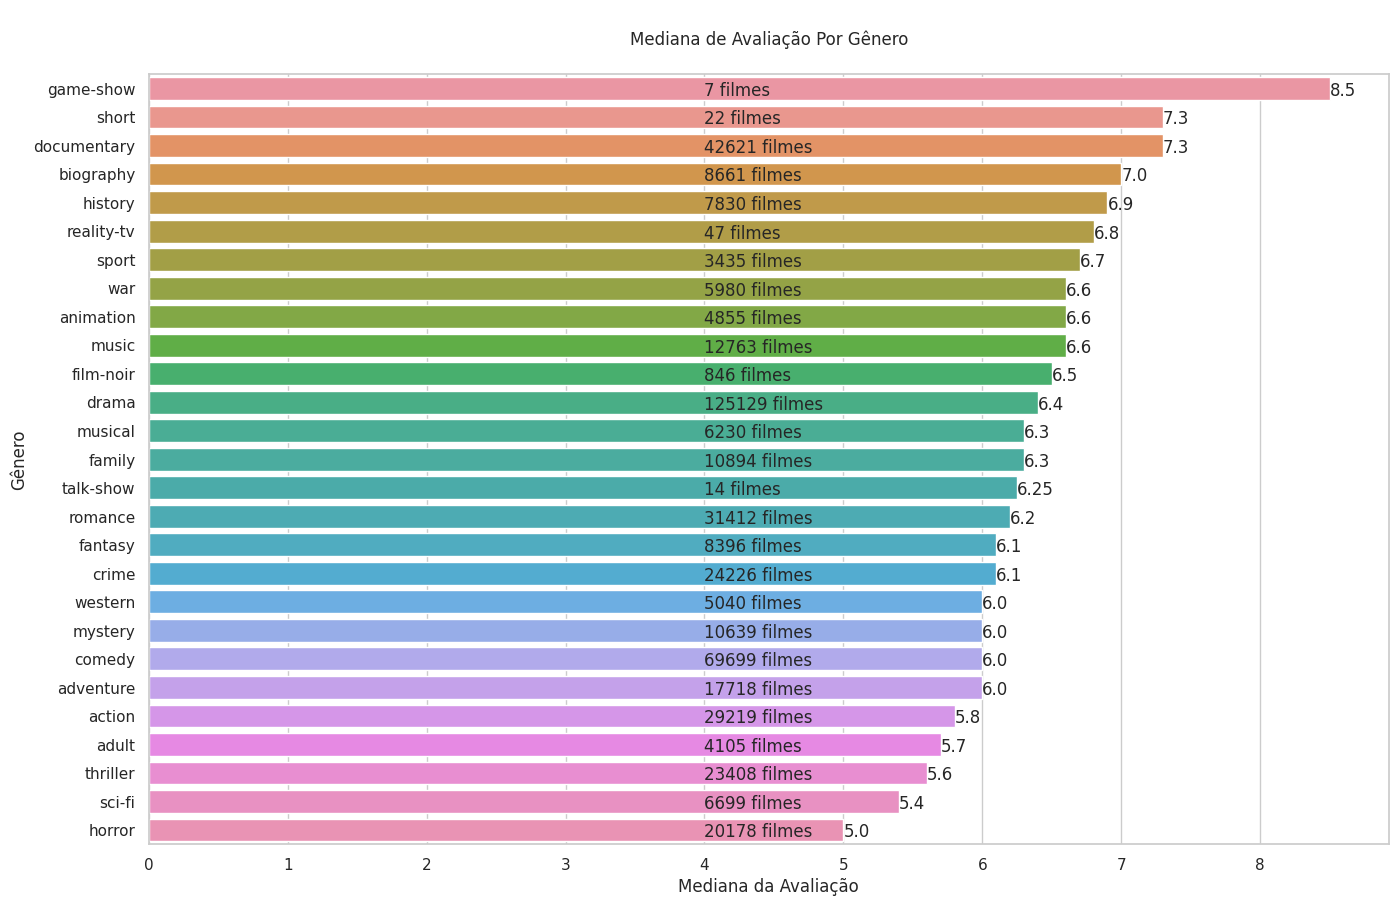

In [78]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

### 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

In [80]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [82]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, con)

In [ ]:
display(resultado4)

In [83]:
display(resultado4['premiered'])

0         1894
1         1897
2         1899
3         1899
4         1900
          ... 
281616    2022
281617    2022
281618    2022
281619    2022
281620    2022
Name: premiered, Length: 281621, dtype: int64

In [84]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [85]:
type(ratings)

list

In [86]:
ratings[1:10]

[4.5, 3.65, 5.85, 4.3, 3.3, 5.25, 5.3, 4.1, 3.1]

In [87]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [88]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

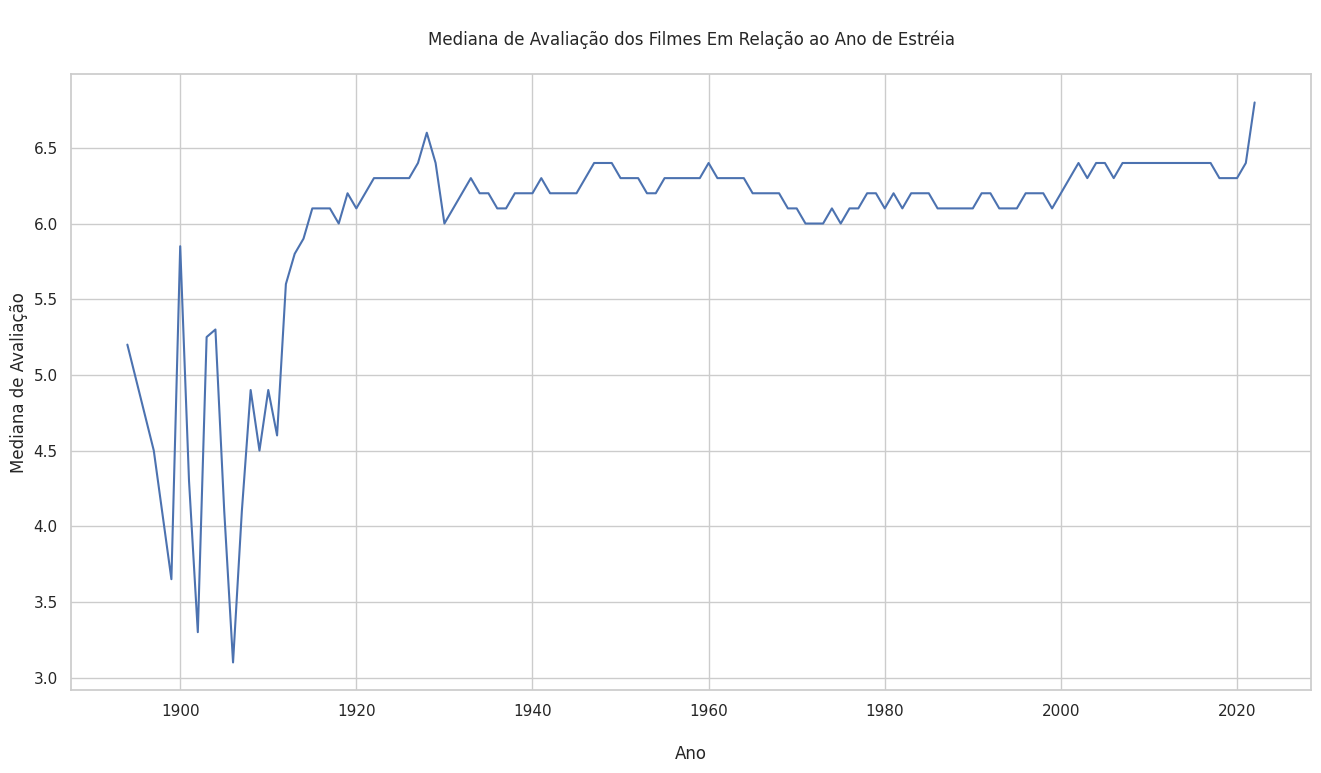

In [89]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

### 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?